<a href="https://colab.research.google.com/github/peimani/Project4/blob/master/Image_Classification_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **X-Ray Image Visualization**


> Using Image Classification with Deep Learning, we will create a program which will be able to take an x-ray and classify it with a diagnosis of Pneumonia or Normal.




> By Arash Peimani (Flatiron Full Time Cohort)


> Instructor: James Irving



1.   Dataset Used: [Kaggle ](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
2.   Dataset Raw: [Mendeley](https://https://data.mendeley.com/datasets/rscbjbr9sj/3)





# Image Recognition

In [1]:
from google.colab import drive
from pathlib import Path
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# copy the files to colab for faster processing. this bypasses colab having to get 
# bypasses colab having get the data from google drive, which slows the processing
!unzip /content/drive/MyDrive/Development/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# **Installs and Imports**

In [3]:
import numpy as np
import tensorflow as tf

np.random.seed(321)
tf.random.set_seed(321)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys, glob

import datetime as dt
from sklearn import metrics
from tzlocal import get_localzone

In [5]:
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks, models, layers, optimizers, regularizers
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# Path('/content/drive/MyDrive/Development/archive.zip')


In [8]:
# zip_path = '/content/drive/MyDrive/Development/archive.zip'
# !cp “{zip_path}” .
# !unzip -q archive.zip
# !rm archive.zip

## Load the Data

In [9]:
# Get the Directory Paths of the Image sets
train_img = '/content/chest_xray/train'
val_img = '/content/chest_xray/val'
test_img = '/content/chest_xray/test'

### Preview the Data

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


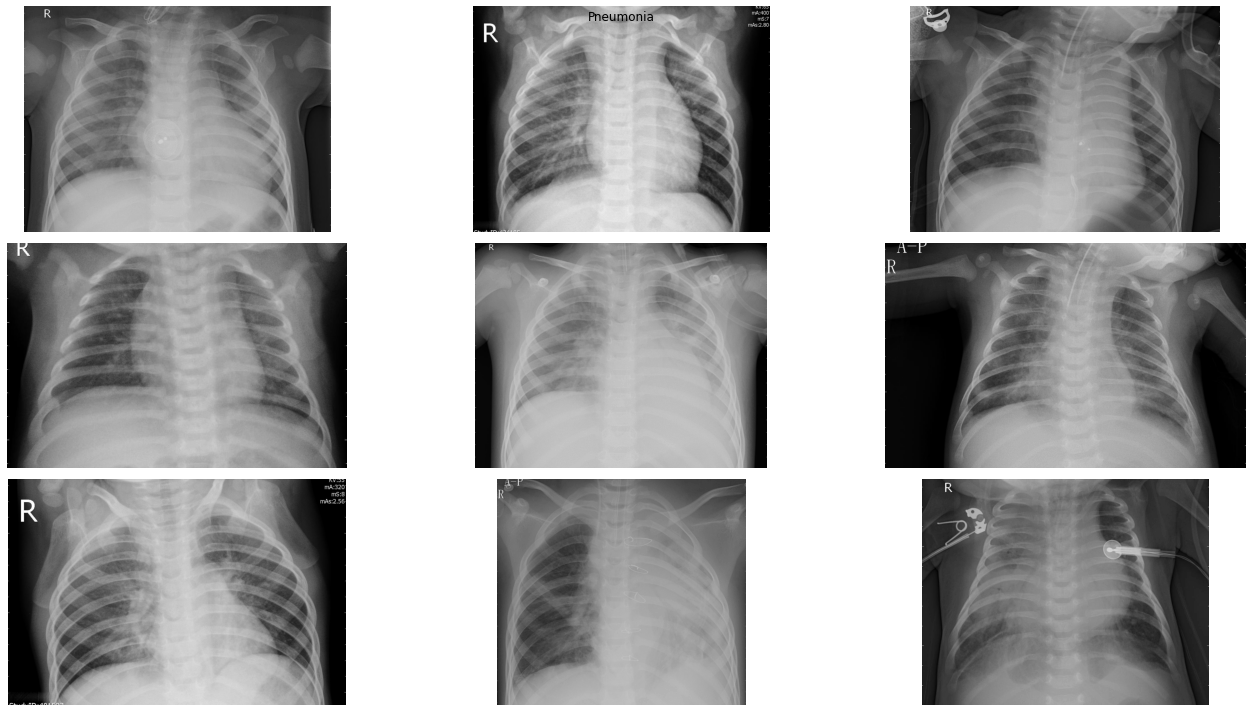

In [10]:

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_img, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_img, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_img, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_img, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_img, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_img, 'NORMAL')))}")

pneumonia = os.listdir("/content/chest_xray/train/PNEUMONIA")

pneumonia_img = '/content/chest_xray/train/PNEUMONIA'


plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_img, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.suptitle('Pneumonia')
plt.tight_layout()

## Data Preparation

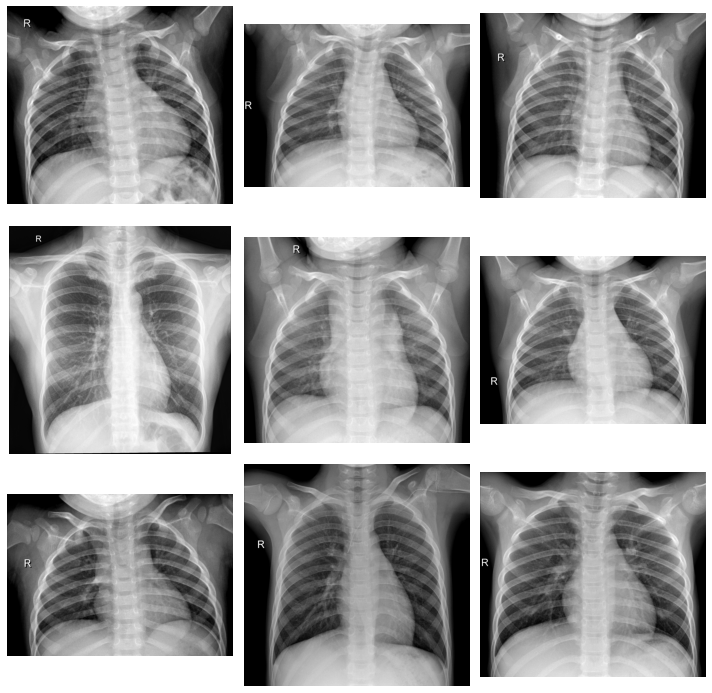

In [11]:
#Preview the images

normal = os.listdir('/content/chest_xray/train/NORMAL')
normal_dir = '/content/chest_xray/train/NORMAL'
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

### Class Imbalance: 
  There are 1341 'NORMAL' chest x-rays and 3876 x-rays displaying 
  'PNEUMONIA'. To address is class imbalance I will have to generate 2,535 more NORMAL images to equal the 3876 images displaying PNEUMONIA.

### Image Pre-Processing

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

In [12]:
# Resize all 7685 images in the train directory
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_img,
                                                          target_size = (128, 128), batch_size= 5216)

Found 5216 images belonging to 2 classes.


In [13]:
# Resize all 624 images in the val directory
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_img,
                                                          target_size = (128, 128), batch_size= 624)

Found 624 images belonging to 2 classes.


In [14]:
# Resize all 1 images in the val directory
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_img, 
                                                        target_size = (128, 128), batch_size=16)

Found 16 images belonging to 2 classes.


In [15]:
# Iterate through all of the images and create image-label datasets 
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)


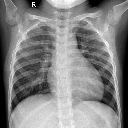

In [16]:
# Preview an image
array_to_img(train_images[500])

## Checking the Shape of Image and Label Arrays

In [17]:
print('Shape of Train Images: ', np.shape(train_images))
print('Shape of Train Labels: ', np.shape(train_labels))
print('Shape of Test Images: ', np.shape(test_images))
print('Shape of Test Labels: ', np.shape(test_labels))
print('Shape of Validation Images: ', np.shape(val_images))
print('Shape of Validation Labels: ', np.shape(val_labels))

Shape of Train Images:  (5216, 128, 128, 3)
Shape of Train Labels:  (5216, 2)
Shape of Test Images:  (624, 128, 128, 3)
Shape of Test Labels:  (624, 2)
Shape of Validation Images:  (16, 128, 128, 3)
Shape of Validation Labels:  (16, 2)


### Transform Label Matrices

In [18]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


In [19]:
train_img[0]

array([0.03921569, 0.03921569, 0.03921569, ..., 0.03921569, 0.03921569,
       0.03921569], dtype=float32)

In [20]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216, 2)
(624, 2)
(16, 2)


In [21]:
train_labels[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
# Verify the Class Labels
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [23]:
train_y = np.reshape(train_labels[:,0], (train_labels.shape[0],1))
test_y = np.reshape(test_labels[:,0], (test_labels.shape[0],1))
val_y = np.reshape(val_labels[:,0], (val_labels.shape[0],1))
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [24]:
# # Transform the labels
# train_y = train_labels #np.reshape(train_labels[:,0], (train_labels.shape[0],1))
# test_y = np.reshape(test_labels[:,0], (test_labels.shape[0],1))
# val_y = np.reshape(val_labels[:,0], (val_labels.shape[0],1))
# print(train_y.shape)
# print(test_y.shape)
# print(val_y.shape)

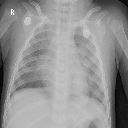

In [25]:
# Select a random image to verify
array_to_img(train_images[4])

In [26]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [27]:
# Build a baseline fully connected model

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(49152,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                983060    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 983,253
Trainable params: 983,253
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Train the model
results = model.fit(train_img, train_y, 
    epochs=100,
    validation_data=(val_img, val_y),
    class_weight=class_weight)
    #steps_per_epoch=10,
    #validation_steps=25,)

Epoch 1/100
163/163 [==============================] - 3s 6ms/step - loss: 0.2235 - accuracy: 0.7229 - val_loss: 0.9460 - val_accuracy: 0.5000
Epoch 2/100
163/163 [==============================] - 1s 4ms/step - loss: 0.1355 - accuracy: 0.8006 - val_loss: 1.7001 - val_accuracy: 0.5000
Epoch 3/100
163/163 [==============================] - 1s 4ms/step - loss: 0.1114 - accuracy: 0.8643 - val_loss: 0.9128 - val_accuracy: 0.6250
Epoch 4/100
163/163 [==============================] - 1s 5ms/step - loss: 0.0911 - accuracy: 0.8891 - val_loss: 1.1758 - val_accuracy: 0.5625
Epoch 5/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0858 - accuracy: 0.9013 - val_loss: 1.0409 - val_accuracy: 0.5625
Epoch 6/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9049 - val_loss: 0.6568 - val_accuracy: 0.7500
Epoch 7/100
163/163 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9216 - val_loss: 0.5635 - val_accuracy: 0.8125

### Baseline Model Evaluation

In [31]:
evaluation_test = model.evaluate(test_img, test_y)
#print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 0s 5ms/step - loss: 0.9843 - accuracy: 0.7676


In [32]:
evaluation_train = model.evaluate(train_img, train_y) 
#print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

163/163 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9908


In [33]:
evaluation_train

[0.034803636372089386, 0.9907975196838379]

In [34]:
evaluation_test

[0.9843233823776245, 0.7676281929016113]

In [35]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model (model,test_img,results,test_labels):
  test_labels= test_labels.argmax(axis=1)
  pred = model.predict(test_img).round()
  
  print(confusion_matrix(test_labels, pred ))
  print(classification_report(test_labels, pred, output_dict=False))
  visualize_training_results(results)

    

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [37]:
def evaluate_cnn (model,test_generator,results):
  
  pred = model.predict(test_generator)
  
  print(confusion_matrix(test_generator.classes, pred > 0.5))
  print(classification_report(test_generator.classes, pred > 0.5, output_dict=False))
  visualize_training_results(results)

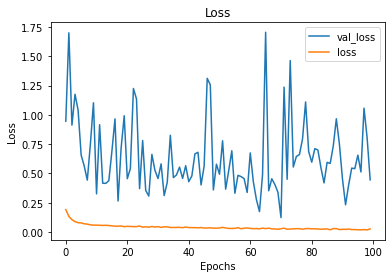

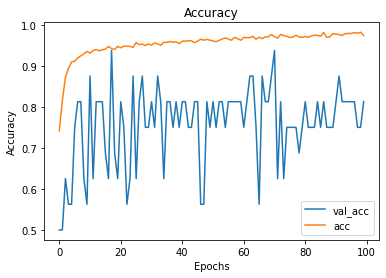

In [38]:
visualize_training_results (results)

In [39]:
 pred = model.predict(test_img)
 pred.round()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [40]:
test_labels.argmax(axis=1)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

[[141  93]
 [386   4]]
              precision    recall  f1-score   support

           0       0.27      0.60      0.37       234
           1       0.04      0.01      0.02       390

    accuracy                           0.23       624
   macro avg       0.15      0.31      0.19       624
weighted avg       0.13      0.23      0.15       624



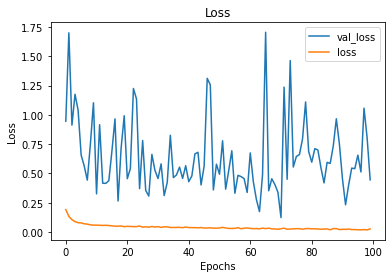

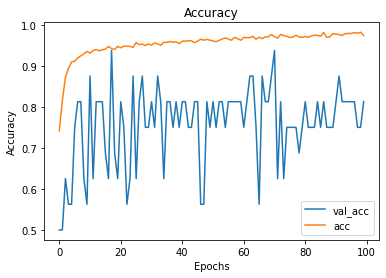

In [41]:
evaluate_model (model,test_img,results, test_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Accuracy Evolution')

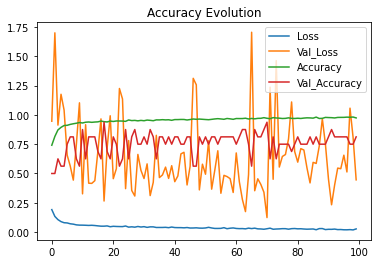

In [42]:
plt.subplot()
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot()
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [43]:
# from sklearn.metrics import confusion_matrix, classification_report

# pred = model.predict(test_img)
# # could round
# print(confusion_matrix(test_generator.classes, pred > 0.5))
# pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))


In [44]:
# print(confusion_matrix(test_generator.classes, pred > 0.7))
# pd.DataFrame(classification_report(test_generator.classes, pred > 0.7, output_dict=True))

In [45]:
# pred = pred.predict(val_images)

### Saving the Baseline Model

In [46]:
import time
import datetime
from datetime import date

model.save('baseline_chest_xray_ALL_data_'+str(date.today())+'.h5')

## CNN Modeling

In [47]:
# Optimizer
# Create a dictionary of optimizer, and assign different colors to the optimizers for plotting the model's loss
optimizers = {"RMSprop": {"optimizer": RMSprop(), "color":"blue"},
                  "adam_01": {"optimizer": Adam(lr=0.01), "color":"red"},
                  "sgd": {"optimizer": SGD(), "color":"purple"},
                  "adadelta": {"optimizer": Adadelta(), "color":"pink"},
                  "adagrad": {"optimizer": Adagrad(), "color":"yellow"}}

In [48]:
for optimizer, d in optimizers.items():
  print(f'Testing{optimizer}')

TestingRMSprop
Testingadam_01
Testingsgd
Testingadadelta
Testingadagrad


In [49]:
train_img2 = '/content/chest_xray/train'

test_img2 = '/content/chest_xray/test'

In [50]:
# Resize all 7685 images in the train directory
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_img2, class_mode = 'binary',
                                                          target_size = (128, 128), batch_size= 64)

Found 5216 images belonging to 2 classes.


In [51]:
test_img

array([[0.7568628 , 0.7568628 , 0.7568628 , ..., 0.2901961 , 0.2901961 ,
        0.2901961 ],
       [0.49803925, 0.49803925, 0.49803925, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.05882353, 0.05882353, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.05490196, 0.05490196,
        0.05490196],
       [0.43921572, 0.43921572, 0.43921572, ..., 0.05882353, 0.05882353,
        0.05882353]], dtype=float32)

In [52]:
# Resize all 624 images in the val directory
test_val_generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_generator = test_val_generator.flow_from_directory(test_img2, class_mode = 'binary', subset = 'training',
                                                          target_size = (128, 128), batch_size=64)

Found 562 images belonging to 2 classes.


In [53]:
# Resize all 1 images in the val directory
val_generator = test_val_generator.flow_from_directory(test_img2, class_mode = 'binary', subset = 'validation',
                                                          target_size = (128, 128), batch_size=64)

Found 62 images belonging to 2 classes.


In [54]:
# Your code here; design and compile the model
model2 = Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu')) #increase number of units
#add another dense layer
model2.add(layers.Dense(1, activation='sigmoid'))

In [55]:

results2=model2.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy']) #rmsprop

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import date
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='baseline_chest_xray_ALL_data_'+str(date.today())+'.h5', monitor='val_loss', save_best_only=True)]

In [57]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [58]:
results2 = model2.fit(train_generator, 
                      epochs=10, 
                      callbacks=early_stopping, 
                      batch_size=64, 
                      validation_data=val_generator)


Epoch 1/10
82/82 [==============================] - 52s 569ms/step - loss: 0.4240 - accuracy: 0.8159 - val_loss: 0.7660 - val_accuracy: 0.7419
Epoch 2/10
82/82 [==============================] - 46s 567ms/step - loss: 0.1136 - accuracy: 0.9565 - val_loss: 0.5462 - val_accuracy: 0.8065
Epoch 3/10
82/82 [==============================] - 46s 565ms/step - loss: 0.0774 - accuracy: 0.9718 - val_loss: 0.6021 - val_accuracy: 0.7903
Epoch 4/10
82/82 [==============================] - 46s 562ms/step - loss: 0.0777 - accuracy: 0.9702 - val_loss: 0.9384 - val_accuracy: 0.7419
Epoch 5/10
82/82 [==============================] - 46s 565ms/step - loss: 0.0655 - accuracy: 0.9749 - val_loss: 0.6006 - val_accuracy: 0.7903
Epoch 6/10
82/82 [==============================] - 47s 573ms/step - loss: 0.0500 - accuracy: 0.9822 - val_loss: 0.6397 - val_accuracy: 0.8065
Epoch 7/10
82/82 [==============================] - 48s 580ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.6077 - val_accuracy: 0.8065

## Model Evaluation

In [59]:
evaluation_test2 = model2.evaluate(test_generator)

9/9 [==============================] - 4s 480ms/step - loss: 2.1249 - accuracy: 0.7100


In [60]:
evaluation_train2 = model2.evaluate(train_generator)

82/82 [==============================] - 45s 553ms/step - loss: 0.0308 - accuracy: 0.9887


In [61]:
evaluation_test2

[2.1248950958251953, 0.709964394569397]

In [62]:
evaluation_train2

[0.0307729821652174, 0.9886886477470398]

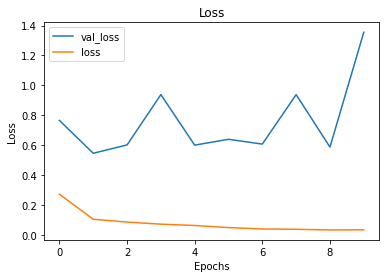

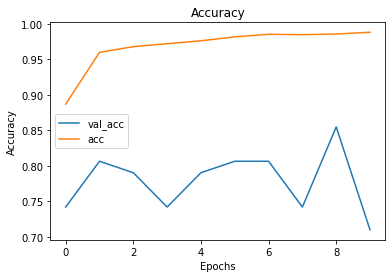

In [63]:
visualize_training_results (results2)

In [64]:
#transform label matrices
train_img2 = train_images.reshape(train_images.shape[0], -1)
test_img2 = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img2.shape)
print(test_img2.shape)
print(val_img.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


In [68]:
# Transform the labels
train_y2 = np.reshape(train_labels[:,0], (train_labels.shape[0],1))
test_y2 = np.reshape(test_labels[:,0], (test_labels.shape[0],1))
val_y2 = np.reshape(val_labels[:,0], (val_labels.shape[0],1))
print(train_y2.shape)
print(test_y2.shape)
print(val_y2.shape)

(5216, 1)
(624, 1)
(16, 1)


In [74]:
train_y2 = train_labels

In [71]:
class_labels_cnn1 = list(test_generator.class_indices.keys())
class_labels_cnn1

['NORMAL', 'PNEUMONIA']

In [82]:
pred_cnn1 = model2.predict(test_images)

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, plot_confusion_matrix

report_cnn1 = classification_report(test_y, pred_cnn1.round(), target_names=class_labels_cnn1)
print(report_cnn1)

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       390
   PNEUMONIA       0.32      0.77      0.45       234

    accuracy                           0.29       624
   macro avg       0.16      0.39      0.22       624
weighted avg       0.12      0.29      0.17       624



In [84]:
#plot a confusion matrix
cnf_matrix_cnn1 = confusion_matrix(y_true=test_y, y_pred=pred_cnn1.round())
np.set_printoptions(precision=2)
print(cnf_matrix_cnn1)

[[  0 390]
 [ 53 181]]


In [91]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  0 390]
 [ 53 181]]


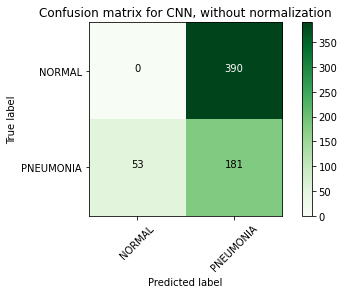

In [93]:
#plot the confusion matrix

cm_plot_labels = ['NORMAL','PNEUMONIA']

plt.figure()
plot_confusion_matrix(cnf_matrix_cnn1, classes=cm_plot_labels,
                      title='Confusion matrix for CNN, without normalization')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Accuracy Evolution')

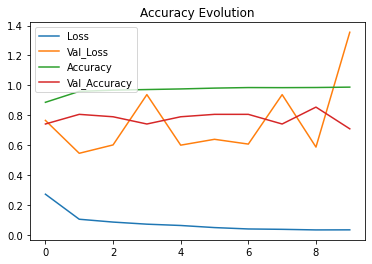

In [94]:
plt.subplot()
plt.plot(results2.history['loss'], label='Loss')
plt.plot(results2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot()
plt.plot(results2.history['accuracy'], label='Accuracy')
plt.plot(results2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')